In [1]:
!wget "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip"

--2022-02-06 10:55:06--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.33.136.128, 2600:1403:9c00:d85::e59, 2600:1403:9c00:d92::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.33.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip.1’

kagglecatsanddogs_3 100%[===================>] 786.68M   222MB/s    in 3.6s    

2022-02-06 10:55:10 (220 MB/s) - ‘kagglecatsanddogs_3367a.zip.1’ saved [824894548/824894548]



In [2]:
!unzip -q "/content/kagglecatsanddogs_3367a.zip"

replace PetImages/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
!ls "PetImages/"

Cat  Dog


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib 
import os
from tqdm import tqdm #graphical progress bar

In [5]:
len(os.listdir("PetImages/Dog"))

12501

In [6]:
len(os.listdir("PetImages/Cat"))

12501

In [7]:
DataPath = pathlib.Path("PetImages")
all_paths = DataPath.glob("*/*.jpg")
all_paths

<generator object Path.glob at 0x7f2f90f89e50>

In [8]:
all_paths = list(all_paths)
all_paths[:10]

[PosixPath('PetImages/Dog/121.jpg'),
 PosixPath('PetImages/Dog/2410.jpg'),
 PosixPath('PetImages/Dog/8085.jpg'),
 PosixPath('PetImages/Dog/3817.jpg'),
 PosixPath('PetImages/Dog/611.jpg'),
 PosixPath('PetImages/Dog/10488.jpg'),
 PosixPath('PetImages/Dog/3339.jpg'),
 PosixPath('PetImages/Dog/10130.jpg'),
 PosixPath('PetImages/Dog/1291.jpg'),
 PosixPath('PetImages/Dog/5987.jpg')]

In [9]:
all_paths = list(map(lambda x : str(x) , all_paths))
all_paths[:10]

['PetImages/Dog/121.jpg',
 'PetImages/Dog/2410.jpg',
 'PetImages/Dog/8085.jpg',
 'PetImages/Dog/3817.jpg',
 'PetImages/Dog/611.jpg',
 'PetImages/Dog/10488.jpg',
 'PetImages/Dog/3339.jpg',
 'PetImages/Dog/10130.jpg',
 'PetImages/Dog/1291.jpg',
 'PetImages/Dog/5987.jpg']

In [10]:
from random import shuffle

shuffle(all_paths)
all_paths[:10]

['PetImages/Dog/11396.jpg',
 'PetImages/Cat/278.jpg',
 'PetImages/Dog/7626.jpg',
 'PetImages/Cat/96.jpg',
 'PetImages/Cat/10788.jpg',
 'PetImages/Cat/11508.jpg',
 'PetImages/Dog/1439.jpg',
 'PetImages/Dog/8669.jpg',
 'PetImages/Cat/10686.jpg',
 'PetImages/Dog/7815.jpg']

In [11]:
def TestImageQuality(all_paths):
    new_all_paths = []
    for path in tqdm(all_paths):
        try :
            image = tf.io.read_file(path)
            image = tf.io.decode_jpeg(image , channels = 3)
        except :
            continue
        new_all_paths.append(path)
    return new_all_paths

all_paths = TestImageQuality(all_paths)
all_paths[:10]

100%|██████████| 25000/25000 [00:40<00:00, 612.93it/s]


['PetImages/Dog/11396.jpg',
 'PetImages/Cat/278.jpg',
 'PetImages/Dog/7626.jpg',
 'PetImages/Cat/96.jpg',
 'PetImages/Cat/10788.jpg',
 'PetImages/Cat/11508.jpg',
 'PetImages/Dog/1439.jpg',
 'PetImages/Dog/8669.jpg',
 'PetImages/Cat/10686.jpg',
 'PetImages/Dog/7815.jpg']

In [12]:
len(all_paths)

24824

In [13]:
# Getting their respective labels 
def get_label(image_path):
    return image_path.split("/")[-2]

all_labels = list(map(lambda x : get_label(x) , all_paths))
all_labels[:10]

['Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Dog', 'Dog', 'Cat', 'Dog']

In [14]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
all_labels = Le.fit_transform(all_labels)

all_labels[:10]

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [15]:
from sklearn.model_selection import train_test_split 

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(all_paths , all_labels)

In [16]:
Train_paths[:10] , Train_labels[:10]

(['PetImages/Cat/8911.jpg',
  'PetImages/Cat/1400.jpg',
  'PetImages/Cat/10365.jpg',
  'PetImages/Dog/2612.jpg',
  'PetImages/Dog/1956.jpg',
  'PetImages/Dog/922.jpg',
  'PetImages/Cat/8865.jpg',
  'PetImages/Cat/12136.jpg',
  'PetImages/Cat/7998.jpg',
  'PetImages/Cat/8167.jpg'],
 array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0]))

In [17]:
# Function used to decode jpeg into Tensor

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [18]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 224 
BATCH_SIZE = 128

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

In [19]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
    return dataset

In [20]:
# Creating Train Dataset object and Verifying it
%time train_dataset = get_dataset(Train_paths , Train_labels)

image , label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 519 ms, sys: 16.2 ms, total: 536 ms
Wall time: 517 ms
(128, 224, 224, 3)
(128,)


Cat


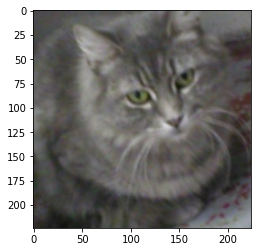

In [21]:
# View a sample Training Image
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [22]:
%time val_dataset = get_dataset(Val_paths , Val_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 28.3 ms, sys: 178 µs, total: 28.4 ms
Wall time: 28.1 ms
(128, 224, 224, 3)
(128,)


Dog


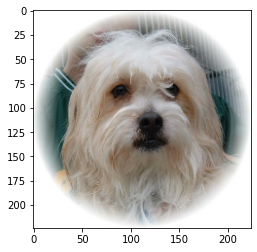

In [23]:
# View a sample Training Image
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [24]:
from tensorflow.keras.applications import InceptionV3

backbone = InceptionV3(
    input_shape=(224,224,3),
    include_top=False
)

model = tf.keras.Sequential([
        backbone,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [25]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 21,804,833
Trainable params: 21,770,401
Non-trainable params: 34,432
_________________________________________________________________
None


In [26]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
# Train the model
history_Inception = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=10,
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/10
145/145 [==============================] - 120s 735ms/step - loss: 0.1743 - accuracy: 0.9305 - val_loss: 0.4011 - val_accuracy: 0.8408
Epoch 2/10
145/145 [==============================] - 107s 731ms/step - loss: 0.1153 - accuracy: 0.9536 - val_loss: 0.4329 - val_accuracy: 0.7407
Epoch 3/10
145/145 [==============================] - 106s 731ms/step - loss: 0.0949 - accuracy: 0.9631 - val_loss: 0.1781 - val_accuracy: 0.9269
Epoch 4/10
145/145 [==============================] - 106s 732ms/step - loss: 0.0859 - accuracy: 0.9669 - val_loss: 0.3179 - val_accuracy: 0.8636
Epoch 5/10
145/145 [==============================] - 106s 736ms/step - loss: 0.0812 - accuracy: 0.9666 - val_loss: 0.1373 - val_accuracy: 0.9482
Epoch 6/10
145/145 [==============================] - 107s 739ms/step - loss: 0.0795 - accuracy: 0.9690 - val_loss: 0.1511 - val_accuracy: 0.9347
Epoch 7/10
145/145 [==============================] - 106s 734ms/step - loss: 0.0712 - accuracy: 0.9727 - val_loss: 0.1383 -

In [28]:
# Evaluating the loaded model
loss, acc = model.evaluate(val_dataset)

print(" Testing Acc : " , acc)
print(" Testing Loss : " , loss)

49/49 [==============================] - 13s 251ms/step - loss: 0.1305 - accuracy: 0.9475
 Testing Acc :  0.9474701881408691
 Testing Loss :  0.13048183917999268
